In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
carmodel=pd.read_csv('Car_Model.csv')

In [239]:
carmodel.shape

(398, 9)

In [240]:
carmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
Cylinders       398 non-null int64
displacement    398 non-null float64
Horsepower      398 non-null object
Weight          398 non-null int64
accelaration    398 non-null float64
ModelYear       398 non-null int64
Version         398 non-null int64
Carname         398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [241]:
carmodel.dtypes

mpg             float64
Cylinders         int64
displacement    float64
Horsepower       object
Weight            int64
accelaration    float64
ModelYear         int64
Version           int64
Carname          object
dtype: object

In [242]:
carmodel.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [244]:
#carmodel['Horsepower']=carmodel['Horsepower'].replace('?',carmodel['Horsepower'].mean())
#directly replacing ? character on object type is not allowed, hence replace ? with NAN first
#carmodel['Horsepower']=carmodel.Horsepower.replace('?','NaN')
carmodel.iloc[25:35]
#carmodel

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
29,27.0,4,97.0,88,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
33,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom


In [245]:
#cant apply mean over object data type, so converting it to float
carmodel['Horsepower']=carmodel['Horsepower'].astype(float)

In [246]:
carmodel['Horsepower'].fillna((carmodel['Horsepower'].mean()),inplace=True)

In [247]:
carmodel.describe(include='all')

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [29]:
carmodel.iloc[331:360]

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version,Carname
331,33.8,4,97.0,67.000000,2145,18.0,80,3,subaru dl
332,29.8,4,89.0,62.000000,1845,15.3,80,2,vokswagen rabbit
333,32.7,6,168.0,132.000000,2910,11.4,80,3,datsun 280-zx
334,23.7,3,70.0,100.000000,2420,12.5,80,3,mazda rx-7 gs
335,35.0,4,122.0,88.000000,2500,15.1,80,2,triumph tr7 coupe
336,23.6,4,140.0,104.469388,2905,14.3,80,1,ford mustang cobra
337,32.4,4,107.0,72.000000,2290,17.0,80,3,honda accord
338,27.2,4,135.0,84.000000,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.000000,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.000000,2620,14.4,81,1,dodge aries wagon (sw)


In [248]:
carmodel.dtypes

mpg             float64
Cylinders         int64
displacement    float64
Horsepower      float64
Weight            int64
accelaration    float64
ModelYear         int64
Version           int64
Carname          object
dtype: object

In [145]:
carmodel.columns

Index(['mpg', 'Cylinders', 'displacement', 'Horsepower', 'Weight',
       'accelaration', 'ModelYear', 'Version', 'Carname'],
      dtype='object')

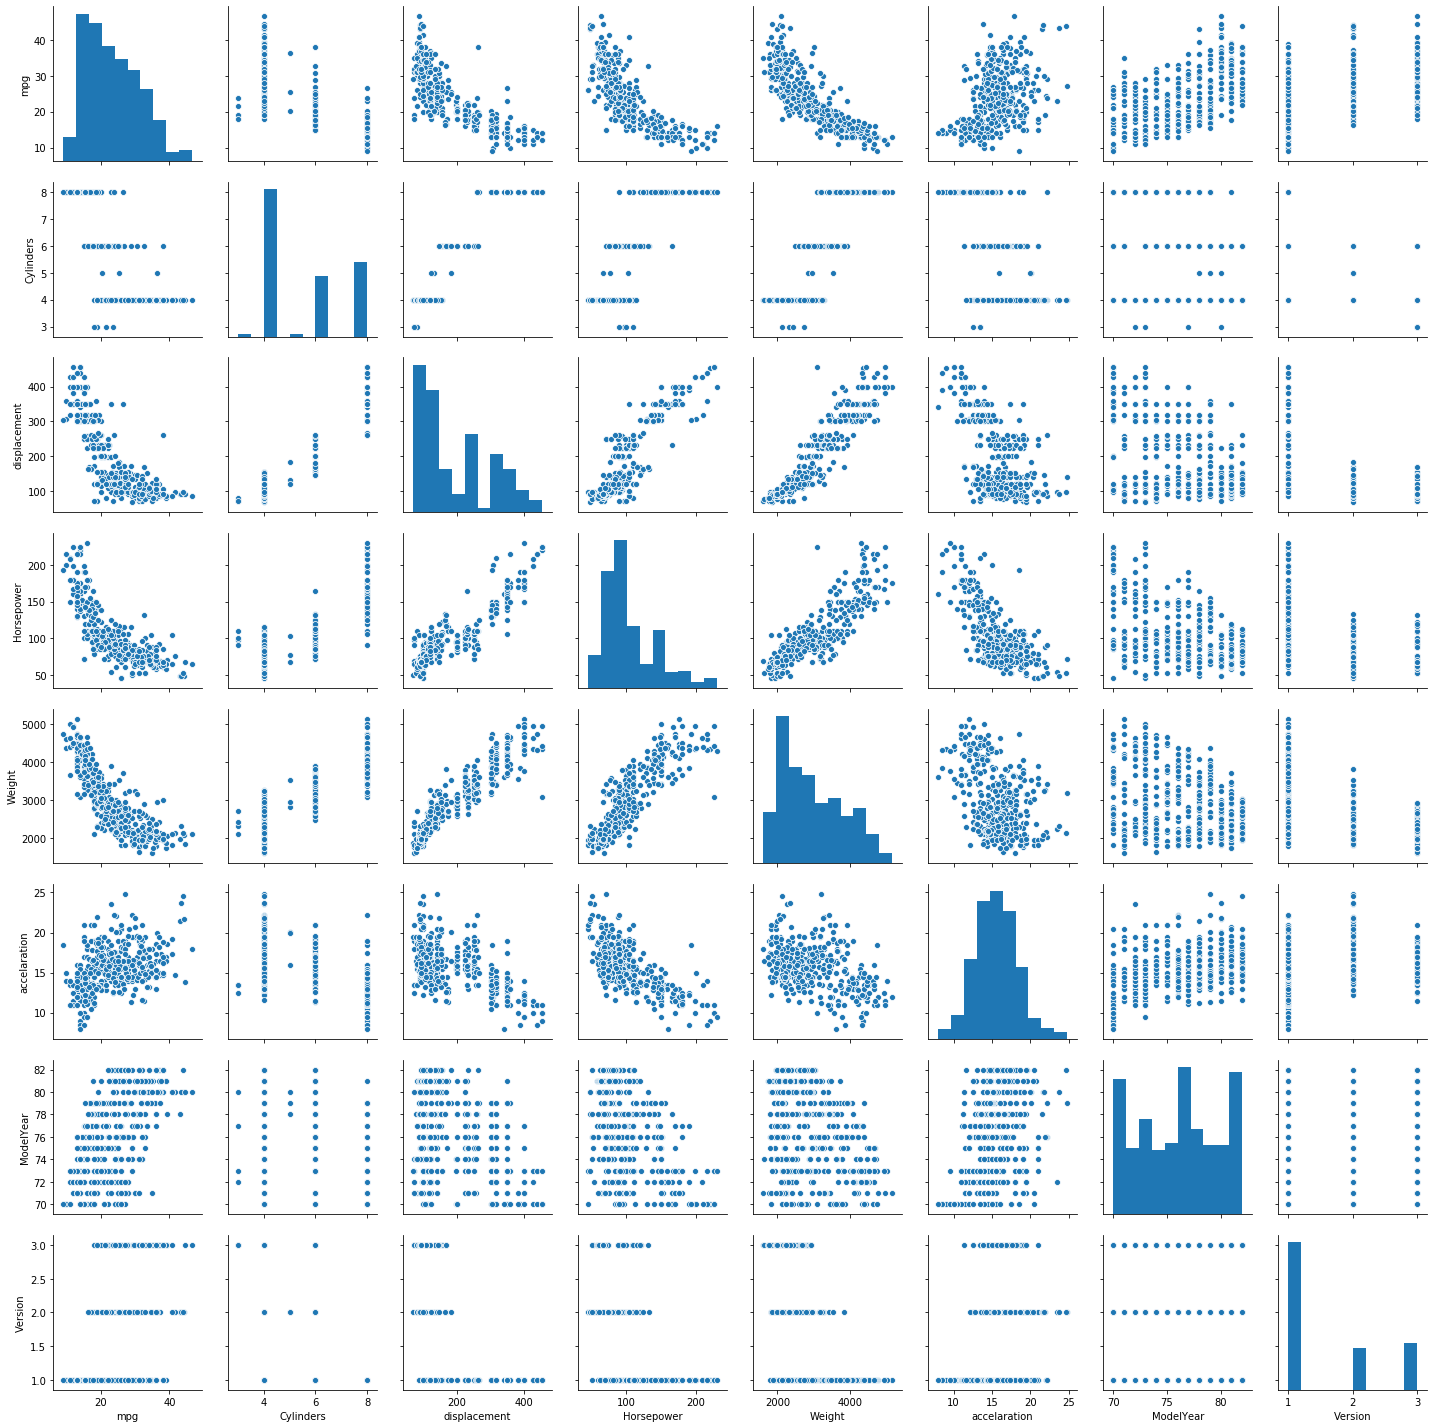

In [96]:
sns.pairplot(carmodel)

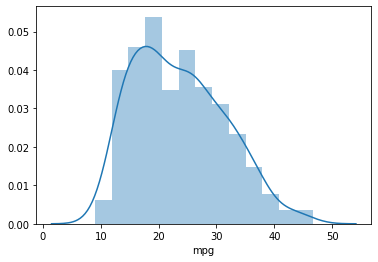

In [249]:
sns.distplot(carmodel['mpg'])

In [178]:
corr = carmodel.corr()
corr

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
Weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
accelaration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
ModelYear,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
Version,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


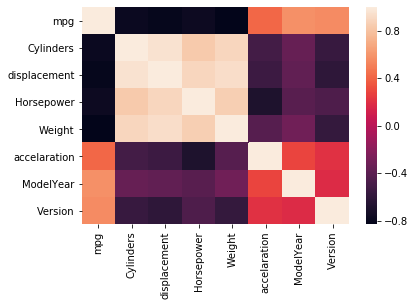

In [250]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [251]:
x=carmodel[['ModelYear']]
y=carmodel['mpg']

In [252]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [253]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

,Coefficient
ModelYear,1.243568


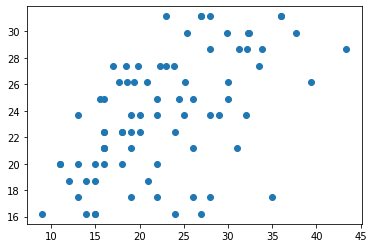

array([28.6517123 , 17.45959826, 18.70316649, 22.43387117, 31.13884875,
       23.67743939, 19.94673471, 24.92100762, 23.67743939, 29.89528053,
       22.43387117, 29.89528053, 23.67743939, 23.67743939, 17.45959826,
       23.67743939, 27.40814407, 31.13884875, 21.19030294, 21.19030294,
       21.19030294, 26.16457585, 28.6517123 , 27.40814407, 27.40814407,
       22.43387117, 24.92100762, 18.70316649, 27.40814407, 16.21603003,
       29.89528053, 16.21603003, 27.40814407, 19.94673471, 22.43387117,
       26.16457585, 24.92100762, 31.13884875, 24.92100762, 19.94673471,
       16.21603003, 17.45959826, 21.19030294, 26.16457585, 22.43387117,
       17.45959826, 21.19030294, 16.21603003, 26.16457585, 29.89528053,
       28.6517123 , 16.21603003, 31.13884875, 22.43387117, 26.16457585,
       19.94673471, 27.40814407, 31.13884875, 19.94673471, 31.13884875,
       23.67743939, 26.16457585, 23.67743939, 19.94673471, 28.6517123 ,
       22.43387117, 27.40814407, 21.19030294, 24.92100762, 18.70

In [255]:
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.show()
predictions

In [256]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.346210218163777
MSE: 39.81422147980319
RMSE: 6.309851145613752


In [257]:
r2_test=lm.score(x_test,y_test)
r2_test

0.28835792319775666

In [186]:
adjr2_test=1-((1-r2_test)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
adjr2_test

0.27923430682849715

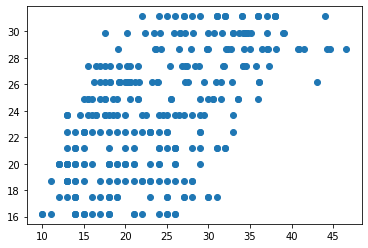

array([21.19030294, 19.94673471, 27.40814407, 23.67743939, 23.67743939,
       27.40814407, 16.21603003, 31.13884875, 26.16457585, 31.13884875,
       28.6517123 , 29.89528053, 31.13884875, 28.6517123 , 27.40814407,
       19.94673471, 16.21603003, 23.67743939, 31.13884875, 21.19030294,
       27.40814407, 27.40814407, 16.21603003, 16.21603003, 16.21603003,
       26.16457585, 16.21603003, 29.89528053, 18.70316649, 21.19030294,
       18.70316649, 22.43387117, 18.70316649, 24.92100762, 21.19030294,
       17.45959826, 23.67743939, 24.92100762, 17.45959826, 28.6517123 ,
       17.45959826, 26.16457585, 24.92100762, 31.13884875, 19.94673471,
       18.70316649, 29.89528053, 16.21603003, 19.94673471, 22.43387117,
       26.16457585, 29.89528053, 21.19030294, 16.21603003, 23.67743939,
       17.45959826, 22.43387117, 17.45959826, 27.40814407, 24.92100762,
       16.21603003, 23.67743939, 31.13884875, 28.6517123 , 22.43387117,
       18.70316649, 26.16457585, 24.92100762, 31.13884875, 21.19

In [258]:
predictions_train=lm.predict(x_train)
plt.scatter(y_train,predictions_train)
plt.show()
predictions_train

In [259]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_train,predictions_train))
print('MSE:',metrics.mean_squared_error(y_train,predictions_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))

MAE: 5.383382309176794
MSE: 40.70346083159963
RMSE: 6.379926397036225


In [260]:
r2_train=lm.score(x_train,y_train)
r2_train

0.34383884499549344

In [261]:
adjr2_train=1-((1-r2_train)*(len(x_train)-1)/(len(x_train)-x_train.shape[1]-1))
adjr2_train

0.34176238564421335

In [190]:
x=carmodel[['Version']]
y=carmodel['mpg']

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [192]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

,Coefficient
Version,5.525688


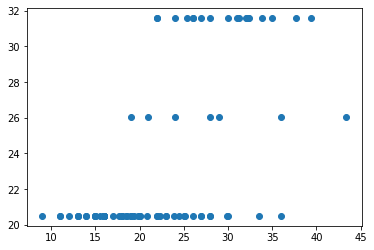

array([26.03889287, 31.56458125, 26.03889287, 20.51320449, 20.51320449,
       26.03889287, 20.51320449, 20.51320449, 20.51320449, 31.56458125,
       20.51320449, 20.51320449, 20.51320449, 31.56458125, 20.51320449,
       20.51320449, 20.51320449, 20.51320449, 31.56458125, 20.51320449,
       31.56458125, 20.51320449, 31.56458125, 20.51320449, 20.51320449,
       20.51320449, 31.56458125, 20.51320449, 20.51320449, 20.51320449,
       31.56458125, 31.56458125, 20.51320449, 31.56458125, 31.56458125,
       20.51320449, 20.51320449, 20.51320449, 20.51320449, 20.51320449,
       20.51320449, 20.51320449, 20.51320449, 31.56458125, 20.51320449,
       20.51320449, 20.51320449, 20.51320449, 20.51320449, 31.56458125,
       20.51320449, 26.03889287, 26.03889287, 20.51320449, 20.51320449,
       20.51320449, 20.51320449, 20.51320449, 20.51320449, 20.51320449,
       31.56458125, 20.51320449, 20.51320449, 20.51320449, 31.56458125,
       20.51320449, 20.51320449, 20.51320449, 31.56458125, 20.51

In [194]:
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.show()
predictions

In [195]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,predictions))
print("MSE: ",metrics.mean_squared_error(y_test,predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  4.860826533047005
MSE:  35.920696009768804
RMSE:  5.993387690594427


In [196]:
r2_test=lm.score(x_test,y_test)
r2_test

0.3579510597352439

In [197]:
adjr2_test=1-((1-r2_test)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
adjr2_test

0.3497196630651829

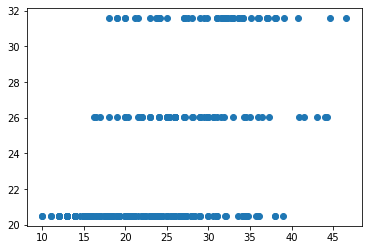

array([31.56458125, 26.03889287, 20.51320449, 20.51320449, 20.51320449,
       20.51320449, 20.51320449, 31.56458125, 26.03889287, 20.51320449,
       31.56458125, 20.51320449, 20.51320449, 26.03889287, 26.03889287,
       20.51320449, 20.51320449, 20.51320449, 31.56458125, 20.51320449,
       20.51320449, 20.51320449, 20.51320449, 26.03889287, 26.03889287,
       20.51320449, 20.51320449, 20.51320449, 20.51320449, 26.03889287,
       31.56458125, 20.51320449, 20.51320449, 26.03889287, 20.51320449,
       31.56458125, 26.03889287, 26.03889287, 20.51320449, 20.51320449,
       20.51320449, 26.03889287, 31.56458125, 20.51320449, 26.03889287,
       26.03889287, 20.51320449, 26.03889287, 20.51320449, 26.03889287,
       31.56458125, 31.56458125, 20.51320449, 20.51320449, 31.56458125,
       20.51320449, 20.51320449, 20.51320449, 20.51320449, 20.51320449,
       20.51320449, 20.51320449, 31.56458125, 31.56458125, 31.56458125,
       20.51320449, 31.56458125, 20.51320449, 31.56458125, 26.03

In [119]:
predictions_train=lm.predict(x_train)
plt.scatter(y_train,predictions_train)
plt.show()
predictions_train

In [198]:
print("MAE: ",metrics.mean_absolute_error(y_train,predictions_train))
print("MSE: ",metrics.mean_squared_error(y_train,predictions_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train,predictions_train)))

MAE:  5.383382309176794
MSE:  40.70346083159963
RMSE:  6.379926397036225


In [199]:
r2_train=lm.score(x_train,y_train)
r2_train

0.30598958039382473

In [200]:
adjr2_train=1-((1-r2_train)*(len(x_train)-1)/(len(x_train)-x_train.shape[1]-1))
adjr2_train

0.3037933448887419

In [201]:
x1=carmodel[['ModelYear','Version','accelaration',]]
y1=carmodel['mpg']

In [202]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [203]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
pd.DataFrame(lm.coef_,x1.columns,columns=['Coefficient'])

,Coefficient
ModelYear,0.952531
Version,4.204803
accelaration,0.601349


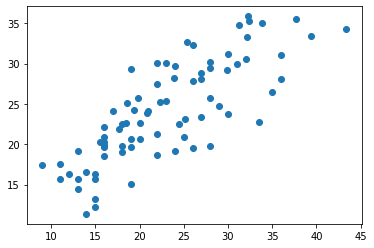

array([34.23797672, 26.44231545, 24.0920666 , 20.6401339 , 28.87135509,
       29.34542636, 19.0357473 , 22.54519499, 19.18726849, 32.72033637,
       19.73811042, 29.18165742, 21.23185505, 30.2428098 , 19.53608217,
       22.61495773, 22.64620912, 28.0896014 , 27.79653462, 19.68760336,
       29.90125608, 23.13691614, 33.33131319, 25.77322386, 24.08944669,
       19.73811042, 30.05277727, 16.57984429, 22.76647891, 11.36736376,
       35.84735111, 23.38506345, 25.29214467, 27.44535306, 29.65108865,
       24.21934432, 19.59858495, 29.47270408, 20.26006884, 15.72832787,
       17.38085364, 14.42461576, 20.28895234, 33.47083866, 22.14350637,
       15.02596475, 18.48490538, 13.17141073, 21.93421817, 35.24600212,
       25.70346112, 19.18026057, 31.09170631, 20.6401339 , 25.12136781,
       15.72832787, 25.23200977, 30.01391817, 17.53237483, 28.0896014 ,
       30.60361919, 23.91866983, 20.93118056, 19.93777079, 35.01509036,
       22.44418087, 28.17861981, 20.89030133, 32.27776852, 16.27

In [205]:
prediction=lm.predict(x1_test)
plt.scatter(y1_test,prediction)
plt.show()
prediction

In [206]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y1_test,prediction))
print("MSE: ",metrics.mean_squared_error(y1_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y1_test,prediction)))

MAE:  3.9702746666000963
MSE:  21.754506390520497
RMSE:  4.66417263729812


In [207]:
r2_test=lm.score(x1_test,y1_test)
r2_test

0.6111584872905015

In [208]:
#Other way of finding R Square
from sklearn.metrics import r2_score
r2_score(y1_test,prediction)

0.6111584872905015

In [209]:
adjr2_test=1-((1-r2_test)*(len(x1_test)-1)/(len(x1_test)-x1_test.shape[1]-1))
adjr2_test

0.5958094802098635

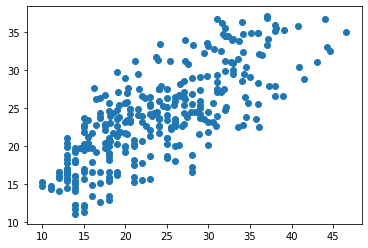

array([27.49586012, 22.63920119, 22.76647891, 19.78861748, 19.66834768,
       23.7887722 , 14.3741087 , 35.53704878, 31.00994785, 27.42811752,
       31.04618704, 24.49113531, 26.52609403, 28.82583582, 27.45236098,
       16.02900236, 11.66803825, 19.78861748, 34.81542999, 19.98827785,
       24.45025608, 24.81106548, 13.47208522, 20.98430753, 22.7883545 ,
       22.59570205, 15.57680668, 26.17491248, 19.88726372, 23.89240623,
       26.49282252, 19.43743592, 17.78254226, 24.82568111, 19.38692886,
       24.0369195 , 23.51234117, 25.84797439, 15.32663925, 26.6656195 ,
       16.22866273, 27.04104453, 32.45817322, 29.35243428, 22.63920119,
       26.49746256, 25.39315879, 17.97756259, 17.83304933, 25.44628577,
       33.95191785, 34.82505783, 20.28895234, 15.27613218, 30.84415879,
       16.52933722, 18.23473795, 14.12394127, 22.76647891, 21.82357621,
       12.26938724, 19.90888728, 35.11610449, 34.95495546, 27.54636719,
       15.9784953 , 32.14787089, 22.42492519, 35.83772327, 23.59

In [210]:
prediction_train=lm.predict(x1_train)
plt.scatter(y1_train,prediction_train)
plt.show()
prediction_train

In [211]:
print("MAE: ",metrics.mean_absolute_error(y1_train,prediction_train))
print("MSE: ",metrics.mean_squared_error(y1_train,prediction_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y1_train,prediction_train)))

MAE:  4.140371986735671
MSE:  25.916263924758738
RMSE:  5.09080189407904


In [212]:
x2=carmodel[['ModelYear','Version','accelaration','Cylinders','displacement','Weight']]
y2=carmodel['mpg']

In [213]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [214]:
lm.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
pd.DataFrame(lm.coef_,x2.columns,columns=['Coefficient'])

,Coefficient
ModelYear,0.793785
Version,1.297357
accelaration,0.137290
Cylinders,-0.288998
displacement,0.015746
Weight,-0.007005


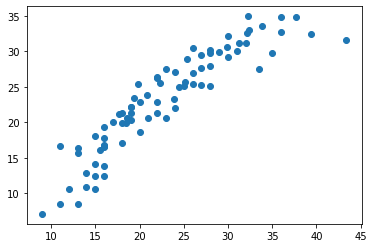

In [215]:
prediction=lm.predict(x2_test)
plt.scatter(y2_test,prediction)
plt.show()

In [216]:
print('MAE: ',metrics.mean_absolute_error(y2_test,prediction))
print('MSE: ',metrics.mean_squared_error(y2_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y2_test,prediction)))

MAE:  2.376725694891801
MSE:  9.2037226333094
RMSE:  3.03376377348491


In [217]:
r2_test=lm.score(x2_test,y2_test)
r2_test

0.8354920416464089

In [218]:
r2_score(y2_test, prediction)

0.8354920416464089

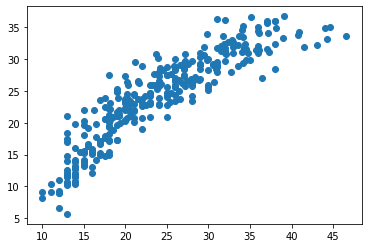

In [219]:
predict_train=lm.predict(x2_train)
plt.scatter(y2_train,predict_train)
plt.show()

In [220]:
print('MAE: ',metrics.mean_absolute_error(y2_train,predict_train))
print('MSE: ',metrics.mean_squared_error(y2_train,predict_train))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y2_train,predict_train)))

MAE:  2.554732956453093
MSE:  11.39326255667527
RMSE:  3.375390726519712


In [221]:
r2_train=lm.score(x2_train,y2_train)
r2_train

0.8163346269402751

In [223]:
adjr2_train=1-((1-r2_train)*(len(x2_train)-1)/(len(x2_train)-x2_train.shape[1]-1))
adjr2_train

0.8127912435371937

In [224]:
x3=carmodel[['ModelYear','Version','accelaration','Weight','displacement','Cylinders','Horsepower']]

In [225]:
corr

,mpg,Cylinders,displacement,Horsepower,Weight,accelaration,ModelYear,Version
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
Weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
accelaration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
ModelYear,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
Version,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [226]:
y3=carmodel['mpg']

In [227]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=100)

In [228]:
lm.fit(x3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
pd.DataFrame(lm.coef_,x3.columns,columns=['Coefficient'])

,Coefficient
ModelYear,0.785614
Version,1.340899
accelaration,0.094113
Weight,-0.006805
displacement,0.017303
Cylinders,-0.318335
Horsepower,-0.009590


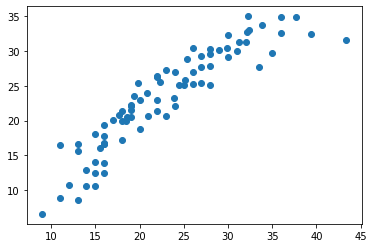

In [230]:
prediction=lm.predict(x3_test)
plt.scatter(y3_test,prediction)
plt.show()

In [232]:
print('MAE: ',metrics.mean_absolute_error(y3_test,prediction))
print('MSE: ',metrics.mean_squared_error(y3_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y3_test,prediction)))

MAE:  2.3720373778200434
MSE:  9.157651635045346
RMSE:  3.026161204404905


In [90]:
r3_test=lm.score(x3_test,y3_test)
r3_test

0.8363155177729387

In [91]:
adjr3_test=1-((1-r3_test)*(len(x3_test)-1)/(len(x3_test)-x3_test.shape[1]-1))
adjr3_test

0.8204017486675299

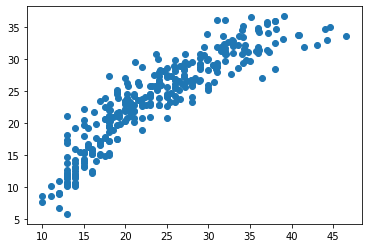

array([26.40337223, 26.7182534 , 19.83406294, 14.87389635, 15.53592619,
       29.94663249,  8.62440142, 36.10607921, 32.19738604, 29.51082389,
       27.77141677, 30.1152062 , 32.5219169 , 31.91649302, 32.44759168,
        8.94968665, 10.64873756, 15.17306568, 34.55998894, 20.42321494,
       27.11551587, 22.92824749, 15.27466217, 20.83279752, 26.97946041,
       28.53099546, 19.01727917, 29.66416396, 23.53827846, 28.06267959,
       27.3089323 , 13.38187721, 23.02425886, 26.34950455, 13.13892268,
       25.62666779, 30.74030182, 30.8926322 , 19.63110174, 26.56655003,
       17.55204452, 31.30433311, 32.00863005, 28.97510495, 21.61814513,
       25.9048734 , 28.94376345, 23.28395231, 13.81240824, 22.93773115,
       33.09465076, 36.64730547, 24.10616199,  8.71197333, 32.8435566 ,
       17.27925066, 21.16612872, 10.41824975, 29.44637314, 28.33988177,
       15.37687002, 16.89322114, 36.04019983, 33.68779321, 25.85011202,
       12.98796069, 34.21951328, 24.76626973, 35.94897598, 27.39

In [92]:
predictions_Train = lm.predict(x3_train)
plt.scatter(y3_train,predictions_Train)
plt.show()
predictions_Train

In [93]:
print('MAE:', metrics.mean_absolute_error(y3_train, predictions_Train))
print('MSE:', metrics.mean_squared_error(y3_train, predictions_Train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_train, predictions_Train)))

MAE: 2.5587466273815247
MSE: 11.378417758034647
RMSE: 3.373191034915551


In [233]:
r3_train=lm.score(x3_train,y3_train)
r3_train

0.8165739328868172

In [234]:
adjr3_train=1-((1-r3_train)*(len(x3_train)-1)/(len(x3_train)-x3_train.shape[1]-1))
adjr3_train

0.8124320539520035